In [10]:
# -*- coding: utf-8 -*-
"""
Created on Fri May  5 01:33:49 2023

@author: utkua
"""

from models import AI_3 as AI_Model
from dataset import ModelBaseTrainDataset
import torch.nn as nn
import torch
import torchvision

from tqdm import tqdm



## Train

In [3]:

# Hyperparameters
num_epochs = 10
batch_size = 128
learning_rate=0.01

model = AI_Model()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


my_dataset = ModelBaseTrainDataset()
my_dataloader = torch.utils.data.DataLoader(my_dataset, batch_size=batch_size, shuffle=True)



In [15]:


main_bar = tqdm(total=num_epochs,desc='Main Process')
#sub_bar = tqdm(total=len(my_dataloader),desc='Sub Process')

for epoch in range(num_epochs):
    main_bar.update(1)
    #sub_bar.reset()
    for count,data in enumerate(my_dataloader):
        #sub_bar.update(1)
        input_data, output_img = data
        if len(input_data)!=2:
            print(input_data)
        out = model(input_data[0],input_data[1])
        loss = criterion(out, output_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1)%1==0:
        print('Epoch [{}/{}], Loss: {:.4f}'
          .format(epoch+1, num_epochs, loss.item()))

Main Process: 100%|██████████| 10/10 [50:30<00:00, 303.05s/it]


[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [1/10], Loss: 0.0780
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [2/10], Loss: 0.0695
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [3/10], Loss: 0.0690
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [4/10], Loss: 0.0748
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [5/10], Loss: 0.0665
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [6/10], Loss: 0.0668
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [7/10], Loss: 0.0772
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [8/10], Loss: 0.0661
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])


Epoch [9/10], Loss: 0.0971
[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])
Epoch [10/10], Loss: 0.1056


## Testing

[ERROR] torch.Size([101, 1, 68, 53]) torch.Size([101, 256, 68, 53])
[ERROR] torch.Size([101, 257, 68, 53])
torch.Size([101, 3, 1090, 850])
tensor([[[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         ...,
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804]],

        [[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         ...,
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804]],

        [[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0

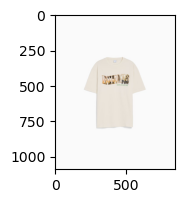

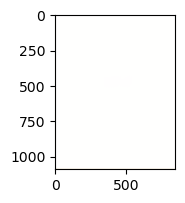

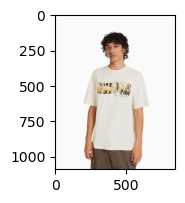

In [16]:

import matplotlib.pyplot as plt
my_dataset = ModelBaseTrainDataset()
my_dataloader = torch.utils.data.DataLoader(my_dataset, batch_size=batch_size, shuffle=True)
with torch.no_grad():
    for data in my_dataloader:
        inp,outp = data
        out = model(inp[0],inp[1])
        #print('!','out:',_.shape,'input:',img.shape,'predict:',recon.shape)
        break
        
print(inp[0].shape)
n = min(inp[0].size(0), 20)
#comparison = torch.cat([img[:n], recon[:n]])

print(inp[0][1])
comparison = inp[0][0]
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()

comparison = out[0]
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()   

comparison = outp[0]
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()       


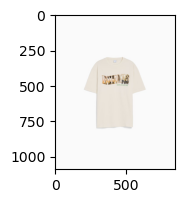

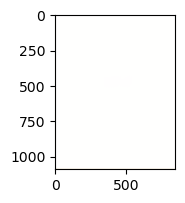

In [17]:
comparison = inp[0][0]
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()

comparison = out[0]
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()      

###  ~Saves and Loads only the model parameters

In [19]:
version="2"

torch.save(model.state_dict(), f'C:/Users/utkua/OneDrive/Masaüstü/AI/AI2/save/parameters_{version}')

In [ ]:
version="2"

model = AI_Model()
model.load_state_dict(torch.load(f'C:/Users/utkua/OneDrive/Masaüstü/AI/AI2/save/parameters_{version}'))

### ~For Saving / Loading Entire Model

In [9]:
torch.save(model, 'C:/Users/utkua/OneDrive/Masaüstü/AI/AI2/save/AI_2/entire_model')

In [ ]:
model = torch.load('C:/Users/utkua/OneDrive/Masaüstü/AI/AI2/save/AI_2/entire_model')